# CALL OF DATA: the day after

Understanding how to filter and mainpulate the raw data using [Pandas](http://pandas.pydata.org/pandas-docs/stable/). And make an interactive embedded plot using [Bokeh](http://bokeh.pydata.org/en/latest/).

[DataSource](http://www.realidadayuda.org/datos)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('./Data/Volcados fusionados para Web 2008_2013 Total.csv')

In [5]:
df.head()

,Modo de Canalización,Tipo de Actores,Actores,Unidad,Título,Año de desembolso,AOD NETA,AOD Bruta,Tipo de Entidad Canalizadora,Detalle de Entidad Canalizadora,Detalle OMUDES /ONGD,País / Territorio,Prioridad geográfica del PD,Sectores CAD,Detalle Sectores CAD,Sector CRS
0,Bilateral,Comunidades Autónomas,CCAA CAT - Cataluña,CCAA CAT ACCD - Cataluña - Agencia Catalana de...,Becas de cooperación internacional y desarroll...,2008,8017.53,8017.53,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,400 - Multisectorial,430 - Otros multisectorial,43081 - Enseñanza / formación multisectorial
1,Bilateral,Comunidades Autónomas,CCAA CAT - Cataluña,CCAA CAT DPTOS - Cataluña - Departamentos de l...,Becas de cooperación internacional y desarroll...,2008,3931.05,3931.05,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,400 - Multisectorial,430 - Otros multisectorial,43081 - Enseñanza / formación multisectorial
2,Bilateral,Comunidades Autónomas,CCAA CAT - Cataluña,CCAA CAT DPTOS - Cataluña - Departamentos de l...,"Reedición, creación multimedia y presentación ...",2008,2141.77,2141.77,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,998 - Sin Especificación / No Clasificados,998 - Sin asignar/sin especificar,99820 - Sensibilización sobre los problemas re...
3,Bilateral,Administración General del Estado,MAEC - Ministerio de Asuntos Exteriores y de C...,MAEC AECID DCAAEO-DCAEO - Departamento de Coop...,APOYO TÉCNICO COORDINACIÓN DEL PRT DE BADGHIS....,2008,18000.00,18000.00,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,998 - Sin Especificación / No Clasificados,998 - Sin asignar/sin especificar,99810 - Sectores no especificados
4,Bilateral,Administración General del Estado,MAEC - Ministerio de Asuntos Exteriores y de C...,MAEC AECID DCAAEO-DCAEO - Departamento de Coop...,PROGRAMA DE RECONSTRUCCIÓN Y DESARROLLO DE LA ...,2008,12000000.00,12000000.00,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,700 - Ayuda de Emergencia,730 - Ayuda a la reconstrucción y rehabilitación,73010 - Ayuda a la reconstrucción y rehabilita...


In [6]:
mask = df['País / Territorio'] == "AFGANISTÁN"  # Create a logical mask that you can apply to the dataframe
# df[mask]

In [7]:
paises = df['País / Territorio']

Below shows how you can use the unique countries in a dataframe as an loop index, create a masked dataframe for each country, and then return the unique sectors of that country. The sectors are the parsed, to extract the integer categories.

In [8]:
for pais in paises.unique()[0:20]:
    print(f'do something with {pais}')
    tmp_df = df[df['País / Territorio'] == pais]
    sectors_per_country = tmp_df['Sectores CAD'].unique()
    sector_numbers = [int(sector.split('-')[0]) for sector in sectors_per_country]
    print(sector_numbers)

do something with AFGANISTÁN
[400, 998, 700, 100, 300, 500, 200, 910, 600]
do something with ÁFRICA SUBSAHARIANA, NO ESPECIFICADOS
[300, 100, 998, 910, 200, 400, 500, 700, 600, 930]
do something with ÁFRICA, NO ESPECIFICADOS
[300, 998, 100, 200, 400, 700, 600, 500, 910, 930]
do something with ALBANIA
[400, 998, 100, 300, 700, 200, 500, 910]
do something with AMÉRICA DEL NORTE, CENTRAL Y CARIBE, NO ESPECIFICADOS
[700, 100, 300, 400, 200, 998, 500, 910, 930]
do something with AMÉRICA DEL SUR, NO ESPECIFICADOS
[998, 200, 100, 400, 300, 700, 910, 500, 930]
do something with AMÉRICA, NO ESPECIFICADOS
[100, 200, 300, 998, 400, 700, 500, 910]
do something with ANGOLA
[100, 998, 300, 500, 400, 200, 700, 910]
do something with ANTIGUA Y BARBUDA
[100, 400, 200, 500]
do something with ARGELIA
[300, 100, 400, 998, 200, 700, 910, 930, 500]
do something with ARGENTINA
[100, 400, 300, 200, 998, 700, 910, 500]
do something with ARMENIA
[400, 100, 998, 300, 200, 700, 500]
do something with ASIA CENTRAL

In [97]:
x = []  # integer for country number
y = []  # sector value
my_xticks = [] # country names (unique x's only)
for n, pais in enumerate(paises.unique()[0:10]):
   # print(f'do something with {pais}')
    tmp_df = df[df['País / Territorio'] == pais]
    sectors_per_country = tmp_df['Sectores CAD'].unique()
    sector_numbers = [int(sector.split('-')[0]) for sector in sectors_per_country]
    for graph_value in sector_numbers:
        my_xticks.append(pais)
        x.append(n)
        y.append(graph_value)
    
    #print(sector_numbers)

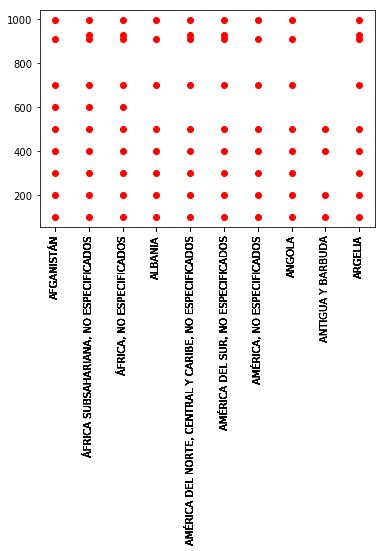

In [98]:
plt.Figure(figsize=(8,80))
plt.xticks(x, my_xticks,rotation='vertical')
plt.plot(x, y,'ro')


In [41]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.sampledata.les_mis import data

In [42]:
nodes = data['nodes']
names = [node['name'] for node in sorted(data['nodes'], key=lambda x: x['group'])]

N = len(nodes)
counts = np.zeros((N, N))
for link in data['links']:
    counts[link['source'], link['target']] = link['value']
    counts[link['target'], link['source']] = link['value']

xname = []
yname = []
color = []
alpha = []
for i, node1 in enumerate(nodes):
    for j, node2 in enumerate(nodes):
        xname.append(node1['name'])
        yname.append(node2['name'])

        alpha.append(min(counts[i,j]/4.0, 0.9) + 0.1)

        if node1['group'] == node2['group']:
            color.append(colormap[node1['group']])
        else:
            color.append('lightgrey')

source = ColumnDataSource(data=dict(
    xname=xname,
    yname=yname,
    colors=color,
    alphas=alpha,
    count=counts.flatten(),
))

p = figure(title="Les Mis Occurrences",
           x_axis_location="above", tools="hover,save",
           x_range=list(reversed(names)), y_range=names)

p.plot_width = 800
p.plot_height = 800
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

p.rect('xname', 'yname', 0.9, 0.9, source=source,
       color='colors', alpha='alphas', line_color=None,
       hover_line_color='black', hover_color='colors')

p.select_one(HoverTool).tooltips = [
    ('names', '@yname, @xname'),
    ('count', '@count'),
]

output_file("les_mis.html", title="les_mis.py example")

show(p) # show the plot

### Bokeh plot

For example, may be interesting to adapt the [Les Miserables example](http://bokeh.pydata.org/en/latest/docs/gallery/les_mis.html).

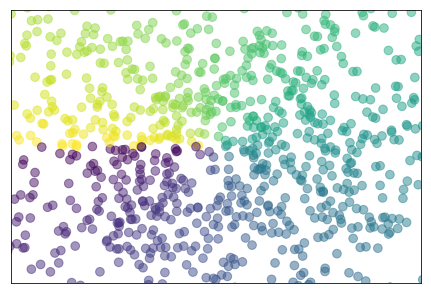

In [72]:
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])
# savefig('../figures/scatter_ex.png',dpi=48)
plt.show()

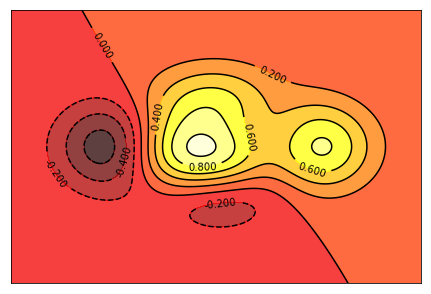

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.axes([0.025,0.025,0.95,0.95])

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([]), plt.yticks([])
# savefig('../figures/contour_ex.png',dpi=48)
plt.show()


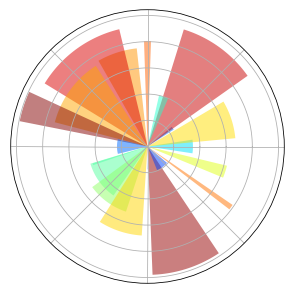

In [74]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes([0.025,0.025,0.95,0.95], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
# savefig('../figures/polar_ex.png',dpi=48)
plt.show()

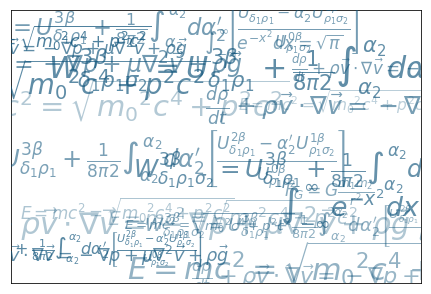

In [75]:
import numpy as np
import matplotlib.pyplot as plt

eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))


plt.axes([0.025,0.025,0.95,0.95])

for i in range(24):
    index = np.random.randint(0,len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12,32)
    x,y = np.random.uniform(0,1,2)
    alpha = np.random.uniform(0.25,.75)
    plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=alpha,
             transform=plt.gca().transAxes, fontsize=size, clip_on=True)

plt.xticks([]), plt.yticks([])
# savefig('../figures/text_ex.png',dpi=48)
plt.show()

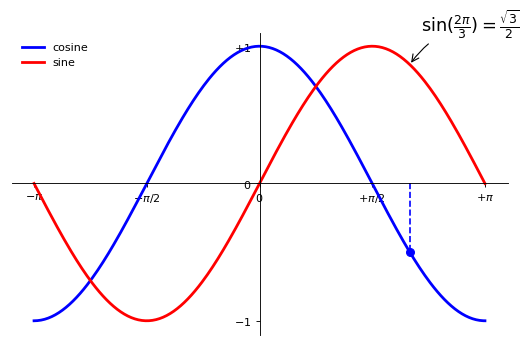

In [96]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=80)
ax = plt.subplot(111)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-",label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",label="sine")


plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, 0, +1],[r'$-1$', r'$0$', r'$+1$'])

t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)],color ='blue',  linewidth=1.5, linestyle="--")
plt.scatter(t,np.cos(t), 50, color ='blue')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),  xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(loc='upper left', frameon=False)

plt.show()

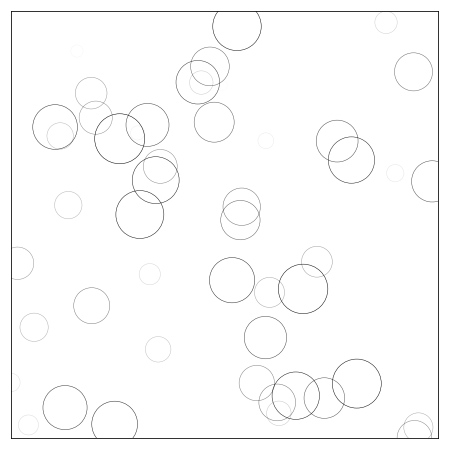

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
ax = fig.add_axes([0.005,0.005,.99,.99], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

# plt.savefig("../figures/rain-static.png",dpi=72)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [ ]:
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, cmap=cm.jet, s=50, edgecolor='')
plt.show()